# Kernel Density Estimate
---


Leave theoretical aspects to one side <br>
Learn how to do the code to display these things

Probability density function plots of: mean =0 variance =0.2
- standard normal distribution = mean (mu) = 0, standard deviation (sigma) = 1 <br>

[Probability Density Function-PDF](https://en.wikipedia.org/wiki/Probability_density_function) <br>

If you input x into PDF formula- bell curves are created
Below shows how this can be manually created in Pytrhon

2 is int 2.0 is a float.  Literals are literal float/integer. Intervals will get scaled up.  Therefore use float (2.0 below)


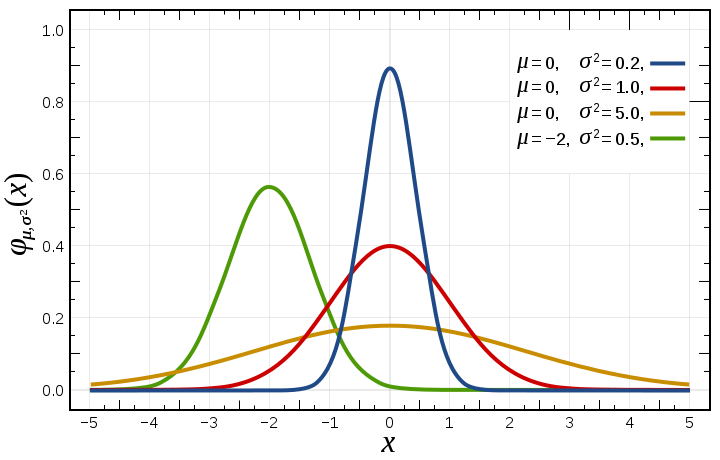

!Image (url= "https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png", width=100, height=100)

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Stats.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Statistical plots.
import seaborn as sns

[matplotlib plot style](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) <br>
[change fig size](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)

In [2]:
# Change the plot style. 
plt.style.use('fivethirtyeight')

# Change default plot size.
plt.rcParams["figure.figsize"] = (18, 10)

### PDF: Probability Density Function
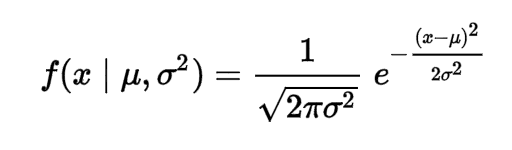

#### Check the np mathemathical functions
This will be used to create the PFD formula above to code below

In [3]:
np.e

2.718281828459045

In [4]:
np.exp(1.0)

2.718281828459045

In [5]:
np.pi

3.141592653589793

In [6]:
np.sqrt(9)

3.0

In [7]:
np.square(2.0)

4.0

In [12]:
#Normal distribution.
def normalpdf(x, mu=0.0, sigma=1.0):
    """Calculates the PDF of a normal distrubtion."""
    numer = np.exp(-0.5 * np.square((x - mu) / sigma))
    denom = sigma * np.sqrt(2.0 * np.pi)
    return (numer / denom)

In [13]:
# Test value.  Check versus curve at mu =0 for curve height.  Should correlate to output
normalpdf(0.0)

0.3989422804014327

In [15]:
# Test value. Check versus curve at mu = 10 for curve height.
# Should correlate to output i.e curve is on x axis. Output (height ) value 
normalpdf(10.0)

7.69459862670642e-23

In [14]:
# Test values. Check versus curve at mu = [array values] for curve height.  Should correlate to output
normalpdf(np.array([-1.0, 0.0, 1.0]))

array([0.24197072, 0.39894228, 0.24197072])

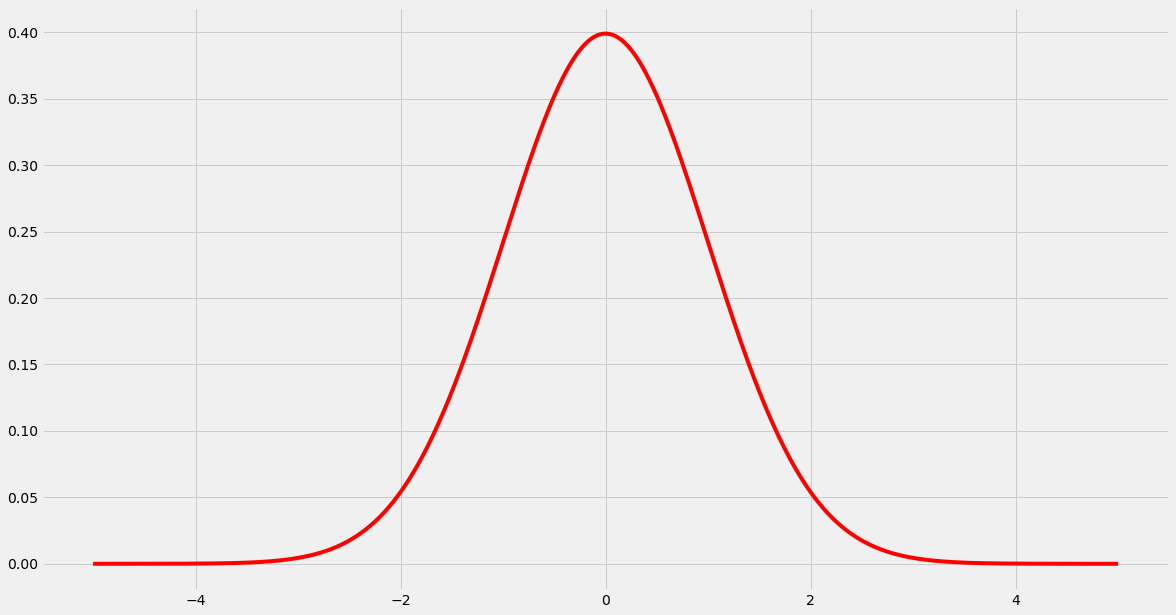

In [16]:
# Create some x values.
# Linspace is a function in numpy- lower limit, and upper limit,  and how many different points to chop it up into
x = np.linspace(-5.0, 5.0, 1000)

# Calculate our y values from x. Feed x into normalpdf- output y
y = normalpdf(x)

# Create a plot.
fig, ax = plt.subplots()

# Plot the values.
ax.plot(x, y, 'r-')

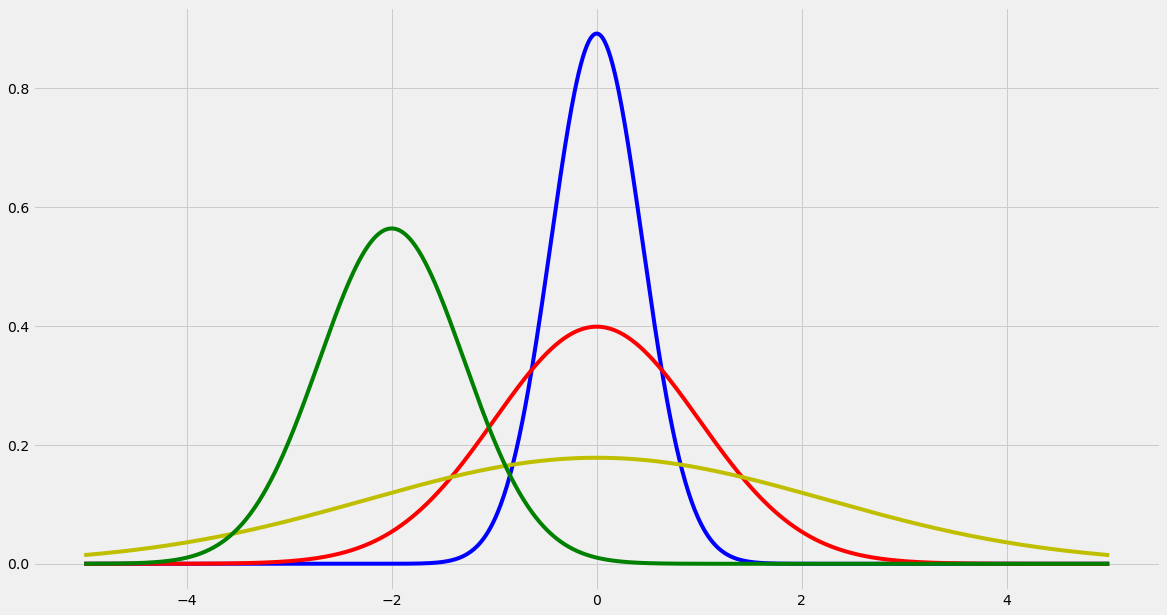

In [17]:
# loop through different mu and sigmas.
# create a plot
# sqrt required as whats given in wikipedia plot is variance
fig, ax = plt.subplots()

# Create some x values.
x = np.linspace(-5.0, 5.0, 1000)

# Calculate our y values from x with mu=0.0 and sigma=sqrt(0.2).
y = normalpdf(x, 0.0, np.sqrt(0.2))
# Plot the values.
ax.plot(x, y, 'b-')

# THE ORIGINAL
# Calculate our y values from x with mu=0.0 and sigma=1.0.
y = normalpdf(x)
# Plot the values.
ax.plot(x, y, 'r-')

# Calculate our y values from x with mu=0.0 and sigma=sqrt(5.0).
y = normalpdf(x, sigma=np.sqrt(5.0))
# Plot the values.
ax.plot(x, y, 'y-')

# Calculate our y values from x with mu=-2.0 and sigma=sqrt(0.5).
y = normalpdf(x, -2.0, np.sqrt(0.5))
# Plot the values.
ax.plot(x, y, 'g-')

## Fill between

In [ ]:
# Create some x values.
x = np.linspace(-5.0, 5.0, 1000)

# Calculate our y values from x.
y = normalpdf(x)

# Create a plot.
fig, ax = plt.subplots()

# Plot the values.
ax.plot(x, y, 'k-')

# Limit x values to -2.0 and 2.0
x = np.linspace(-2.0, 2.0, 1000)

# Calculate the pdf values.
y = normalpdf(x)

# Fill between x axis and y - for x values between -2.0 and 2.0.
ax.fill_between(x, 0, y)

# Draw a couple of vertical lines.
ax.axvline(-2.0, color='grey', linestyle=':')
ax.axvline(2.0, color='grey', linestyle=':')

# Draw some text.
ax.text(0, 0.2, '~95%', horizontalalignment='center')

In [ ]:
# Probability of value less than 2.0.
stats.norm().cdf(2.0)

In [ ]:
# Probability of value less than -2.0.
stats.norm().cdf(-2.0)

In [ ]:
# Probability of seeing value between -2.0 and 2.0.
stats.norm().cdf(2.0) - stats.norm().cdf(-2.0)

In [ ]:
# Probability of seeing value between -3.0 and 3.0.
stats.norm().cdf(3.0) - stats.norm().cdf(-3.0)

Lots of small PDFs

In [ ]:
# Load iris.
df = pd.read_csv('https://github.com/ianmcloughlin/datasets/raw/main/iris.csv')
df

In [ ]:
# Extract sepal lengths.
vals = df['sepal_length'].to_numpy()[:150]

# Minimum and maximum values.
low, high = vals.min(), vals.max()

# Create some space on the x axis.
diff = high - low
low = low - diff
high = high + diff

# Create some x values.
x = np.linspace(low, high, 1000)

# Create a plot.
fig, ax = plt.subplots()

# Set the initial previous y values to 0.
prev = 0 * x

# Select a value from the data.
for i in vals:
    # Calculate our y values from x.
    y = normalpdf(x, mu=i, sigma=0.15)
    # Add the previous sums of the y values.
    y = y + prev

    # Fill between x axis and y.
    ax.fill_between(x, prev, y, alpha=0.3)
    
    # Update the prev array.
    prev = y
    

# Plot the values.
ax.plot(x, y, 'k-')

Using pandas

In [ ]:
df['sepal_length'].plot.kde()

In [ ]:
sns.pairplot(data=df, hue='species')

#### End